# Advnaced Python: Individual Assignment
## MBD O2
### Sara Krumpak


#### Bike Sharing Rental Prediction

For this problem we are dealing with a regression problem. We will use different Regression models to try and predict how many bikes will be rented on a specific day

## 1.Import Libraries and Data

In [1]:
import dask
import dask.dataframe as dd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from dask_ml.linear_model import LogisticRegression

In [2]:
#df_day = dd.read_csv("/Users/sarakrumpak/Documents/IE Business School/MBD/Term 3/Advanced Python/Assignments/Individual Assignment/Bike-Sharing-Dataset 2/day.csv")
df = dd.read_csv("/Users/sarakrumpak/Documents/IE Business School/MBD/Term 3/Advanced Python/Assignments/Individual Assignment/Bike-Sharing-Dataset 2/hour.csv")

In [3]:
df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 17 entries, instant to cnt
dtypes: object(1), float64(4), int64(12)

In [4]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## 2.EDA

### Identifying null values
##### According to the below the code this dataset does not have any null value.

In [5]:
df.isna().sum().compute()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Trying to identify null values in a more visual way we use below visualization, which confirms that there is no missing value in this dataset.

#### columns' name modification

In [6]:
df = df.rename(
    columns={
        "dteday": "datetime",
        "weathersit": "weather_condition",
        "cnt": "total_bike_rented",
    },
)

In [7]:
df.head()

,instant,datetime,season,yr,mnth,hr,holiday,weekday,workingday,weather_condition,temp,atemp,hum,windspeed,casual,registered,total_bike_rented
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Columns' type modification:
##### Taking a look at the dataset information, we see that some columns are not in the appropriate data type. For instance, datetime is an object while it should be in date format. also we have some columns that re factor but in the dataset are presented as integer, season, year, moth, hr, holiday, workingday, weather_condition are of those.

In [8]:
df["datetime"] = dd.to_datetime(df.datetime)

In [9]:
features_to_transform = [
    "season",
    "yr",
    "mnth",
    "hr",
    "holiday",
    "weekday",
    "workingday",
    "weather_condition",
]

In [10]:
def type_shifter(df, features, new_type):
    """this function takes the selected features of a data frame and 
    cast them to the new_type"""
    for i in features:
        df[i] = df[i].astype(new_type)
    return df.info()

In [11]:
type_shifter(df, features_to_transform, "category")

<class 'dask.dataframe.core.DataFrame'>
Columns: 17 entries, instant to total_bike_rented
dtypes: category(8), datetime64[ns](1), float64(4), int64(4)

### Renaming the categorical variables' levels:

#### In the priginal dataset all the weekdays and months are presented as integer, although we have already casted them to categorical type, in order to make them more informative, we would change the levels' names:

In [12]:
df["weekday"] = df["weekday"].map(
    {
        0: "Sunday",
        1: "Monday",
        2: "Tuesday",
        3: "Wednesday",
        4: "Thursday",
        5: "Friday",
        6: "Saturday",
    }
)

**Here we will check which season is which numbner based on the unique months based on that season**

In [13]:
df[df["season"] == 1]["mnth"].unique()  # Seems like Winter

Dask Series Structure:
npartitions=1
    category[unknown]
                  ...
Name: mnth, dtype: category
Dask Name: unique-agg, 40 tasks

In [14]:
df[df["season"] == 2]["mnth"].unique()  # Seems like Spring

Dask Series Structure:
npartitions=1
    category[unknown]
                  ...
Name: mnth, dtype: category
Dask Name: unique-agg, 40 tasks

In [15]:
df[df["season"] == 3]["mnth"].unique()  # Seems like Summer

Dask Series Structure:
npartitions=1
    category[unknown]
                  ...
Name: mnth, dtype: category
Dask Name: unique-agg, 40 tasks

In [16]:
df[df["season"] == 4]["mnth"].unique()  # Seems like Autumn

Dask Series Structure:
npartitions=1
    category[unknown]
                  ...
Name: mnth, dtype: category
Dask Name: unique-agg, 40 tasks

In [17]:
df["season"] = df["season"].map({1: "Winter", 2: "Spring", 3: "Summer", 4: "Autumn"})

In [18]:
df["mnth"] = df["mnth"].map(
    {
        1: "01-Jan",
        2: "02-Feb",
        3: "03-Mar",
        4: "04-Apr",
        5: "05-May",
        6: "06-Jun",
        7: "07-Jul",
        8: "08-Aug",
        9: "09-Sep",
        10: "10-Oct",
        11: "11-Nov",
        12: "12-Dec",
    }
)

In [19]:
df["yr"] = df["yr"].map({0: "2011", 1: "2012"})

In [20]:
df["weather_condition"] = df["weather_condition"].map({1: "A", 2: "B", 3: "C", 4: "D"})

In [21]:
df.head()

,instant,datetime,season,yr,mnth,hr,holiday,weekday,workingday,weather_condition,temp,atemp,hum,windspeed,casual,registered,total_bike_rented
0,1,2011-01-01,Winter,2011,01-Jan,0,0,Saturday,0,A,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,01-Jan,1,0,Saturday,0,A,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,01-Jan,2,0,Saturday,0,A,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,01-Jan,3,0,Saturday,0,A,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,01-Jan,4,0,Saturday,0,A,0.24,0.2879,0.75,0.0,0,1,1


### Visualization
#### In order to see if there is any specific trend in different time intervals we present the target variable over month, day and hour to get a more clear vision of the target variable evolution.

In [22]:
sns.set_style("whitegrid")
sns.set_context("talk")
params = {
    "legend.fontsize": "large",
    "figure.figsize": (30, 10),
    "axes.labelsize": "large",
    "axes.titlesize": "large",
    "xtick.labelsize": "large",
    "ytick.labelsize": "large",
}

plt.rcParams.update(params)

AttributeError: 'DataFrame' object has no attribute 'get'

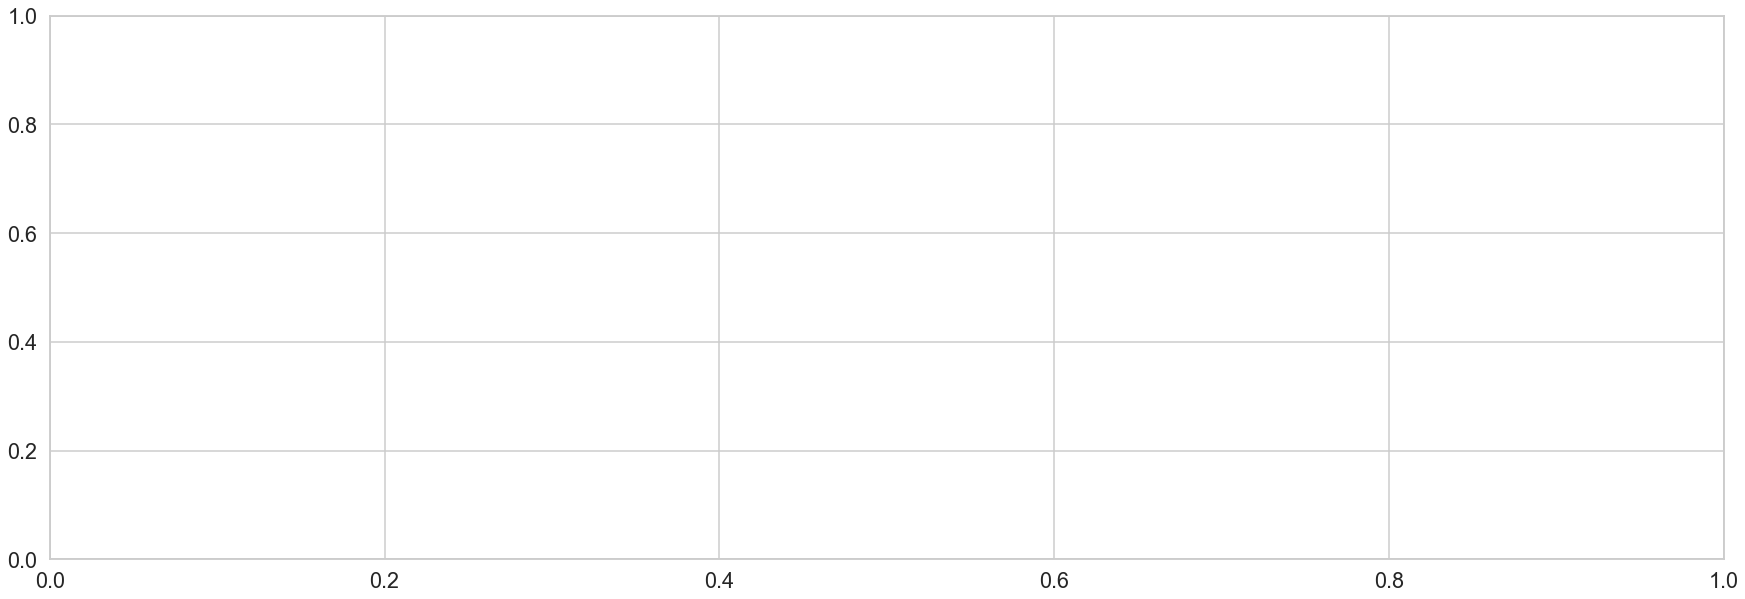

In [35]:
fig, ax = plt.subplots()
sns.lineplot(
    data=df[["hr", "total_bike_rented", "season"]],
    x="hr",
    y="total_bike_rented",
    hue="season",
    ax=ax,
    err_style=None,
)
ax.set(title="Hourly distribution of counts in different seasons");

**The graph shows and interesting pattern. On average the bike renting goes up in the morning and afternoon. Probably due to the morning and afternoon commute to work. At the same time it shows that the rentals go down during the Winter (because of the cold) and increases during the Spring and Summer months.**

AttributeError: 'DataFrame' object has no attribute 'get'

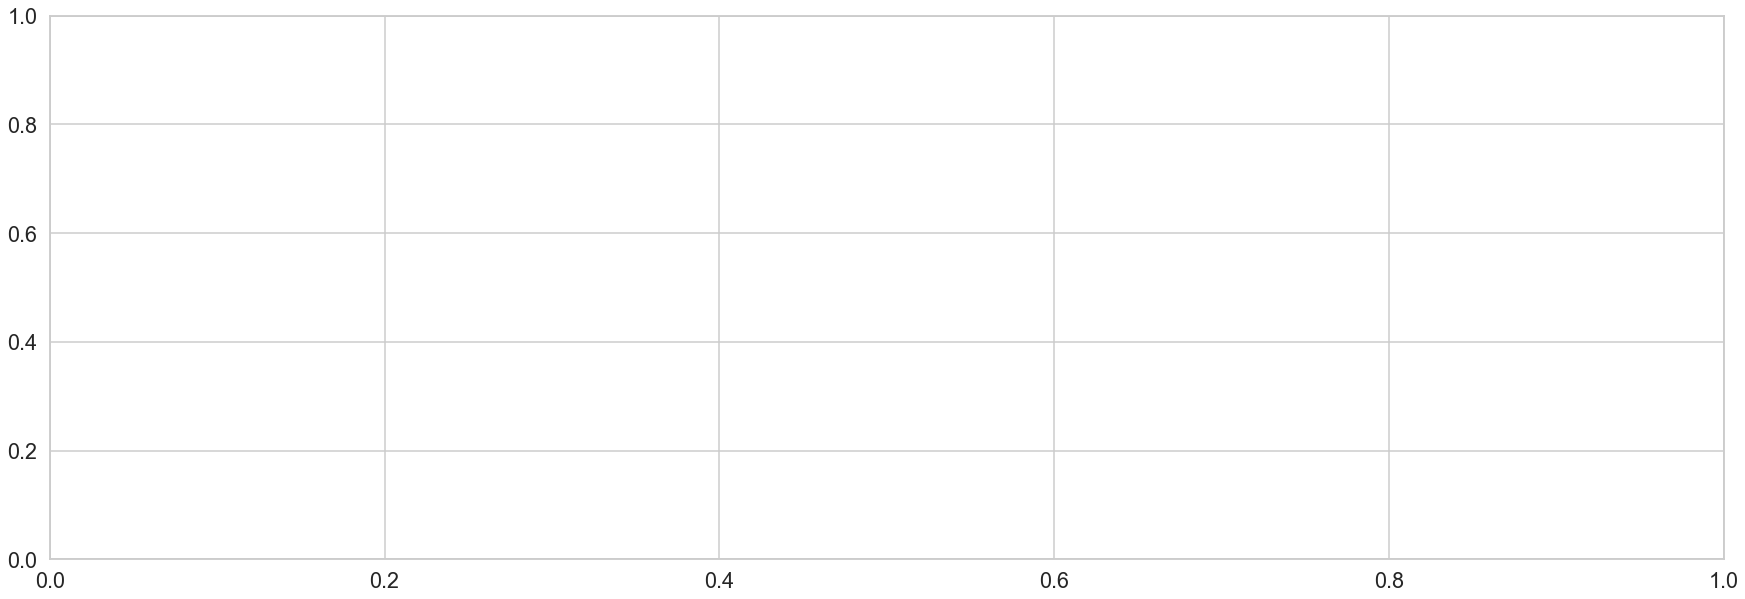

In [33]:
fig, ax = plt.subplots()
sns.lineplot(
    data=df[["hr", "total_bike_rented", "weekday"]],
    x="hr",
    y="total_bike_rented",
    hue="weekday",
    ax=ax,
    err_style=None,
)
ax.set(title=" Hourly distribution of counts over the weekdays");

**Changin the graph to show daily usage, we can see another interesting thing. The graph over the weekdays follow the seasonal chart above. Meaning that a lot of the bike rentals might have something to do with the Morning and Afternoon commute. But during the weekends, those spikes dissappear and there is a bulge during noon hours. This reinforces our hypothesis that the spikes are related to the work commute. During the weekends the rentals are more about leasure trips on the bikes.**

AttributeError: 'DataFrame' object has no attribute 'get'

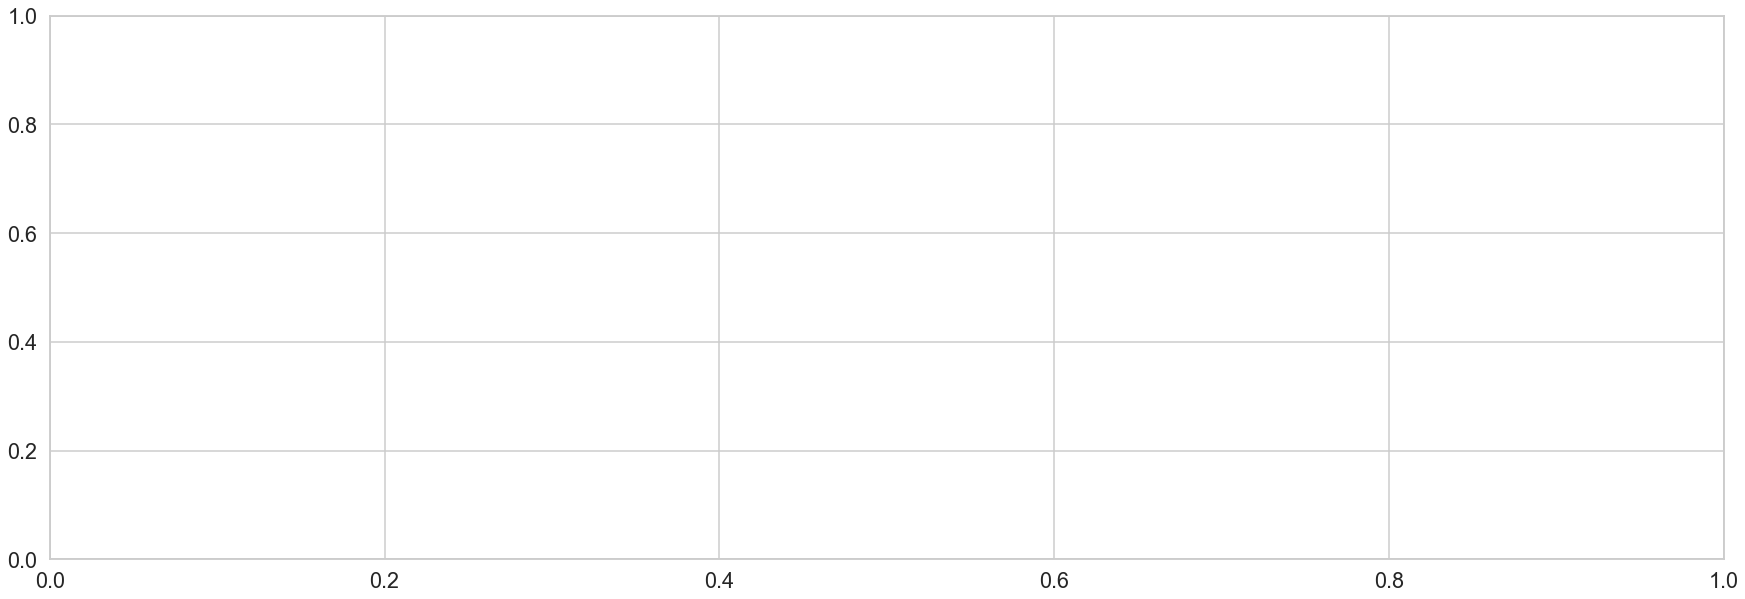

In [36]:
fig, ax = plt.subplots()
sns.lineplot(
    data=df[["mnth", "total_bike_rented", "yr"]], x="mnth", y="total_bike_rented", ax=ax
)
ax.set(title="Monthly distribution of counts");

**This graph shows the average rentals per month and we can see that the rental increases in the summer and decreases in the winter**

TypeError: Truth of Delayed objects is not supported

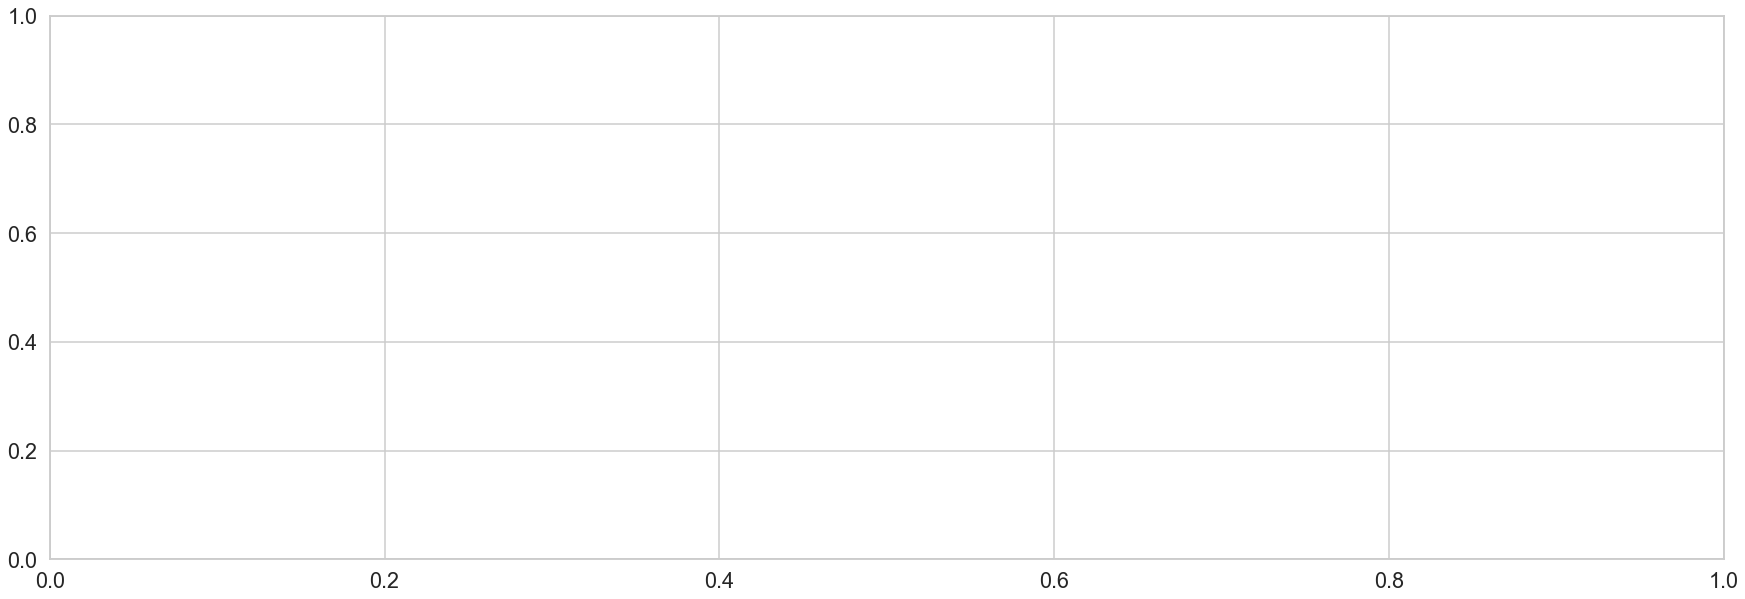

In [37]:
fig, ax = plt.subplots()
sns.boxplot(data=df[["total_bike_rented", "casual", "registered"]], ax=ax, width=0.4);

### Features correlation

#### In order to avoid futrther error in the modeling part it is better to remove potential multicollinearity between features; therefore, we should measure the correlation coefficient between different featuers.

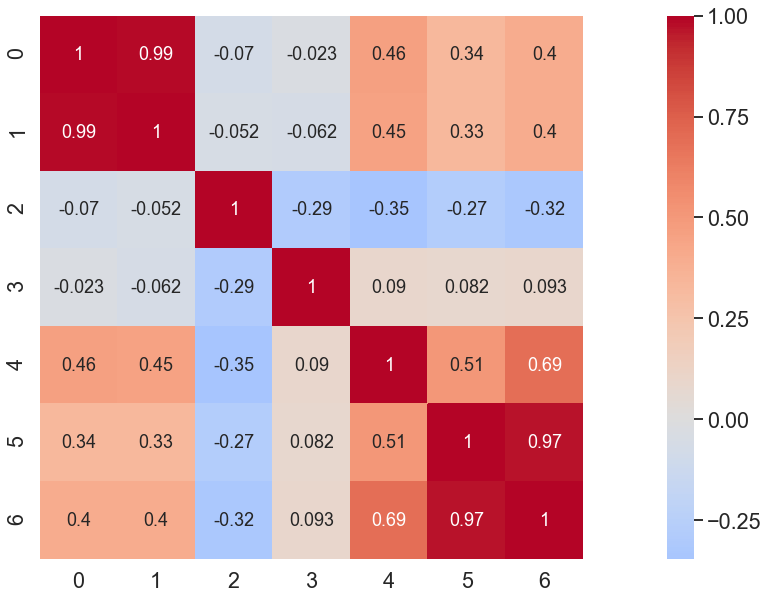

In [23]:
correlation = df[
    ["temp", "atemp", "hum", "windspeed", "casual", "registered", "total_bike_rented"]
].corr()
# correlation.style.background_gradient(cmap='GnBu').set_precision(2)
sns.heatmap(correlation, cmap="coolwarm", square=True, center=0, annot=True);

##### As could be seen above atemp and temp are highly correlated so we will only keep temp and drop the atem from the dataset and other side we cannot say that anu other feature is absolutely useless for Predicting the target Variable so we will keep the other numeric features.

In [24]:
df = df.drop("atemp", axis=1)

In [25]:
df.head()

,instant,datetime,season,yr,mnth,hr,holiday,weekday,workingday,weather_condition,temp,hum,windspeed,casual,registered,total_bike_rented
0,1,2011-01-01,Winter,2011,01-Jan,0,0,Saturday,0,A,0.24,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,01-Jan,1,0,Saturday,0,A,0.22,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,01-Jan,2,0,Saturday,0,A,0.22,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,01-Jan,3,0,Saturday,0,A,0.24,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,01-Jan,4,0,Saturday,0,A,0.24,0.75,0.0,0,1,1


###### Casual and registered are a division of total bikes rented so we canot use them to predict the total bikes rented or our model will be a sum of both

In [26]:
df = df.drop("casual", axis=1)
df = df.drop("registered", axis=1)

In [27]:
df.head()

,instant,datetime,season,yr,mnth,hr,holiday,weekday,workingday,weather_condition,temp,hum,windspeed,total_bike_rented
0,1,2011-01-01,Winter,2011,01-Jan,0,0,Saturday,0,A,0.24,0.81,0.0,16
1,2,2011-01-01,Winter,2011,01-Jan,1,0,Saturday,0,A,0.22,0.80,0.0,40
2,3,2011-01-01,Winter,2011,01-Jan,2,0,Saturday,0,A,0.22,0.80,0.0,32
3,4,2011-01-01,Winter,2011,01-Jan,3,0,Saturday,0,A,0.24,0.75,0.0,13
4,5,2011-01-01,Winter,2011,01-Jan,4,0,Saturday,0,A,0.24,0.75,0.0,1


In [28]:
df.shape

(Delayed('int-36bb0bfa-ee34-4b67-94e2-a95bb0970e1c'), 14)

### Exploring numeric features:

Linear regression algorithm is highly sensitive to the numerical features distribution and also outliers. It means if numeric features are highly skewd probably the regression model would be affected in a negative way. Outliers also are quiet important, and having some outliers in a linear model could change the result totally; therefore in this part we focus on cleaning the numeric values.

In [53]:
numeric_cols = list(df.select_dtypes(include=np.number).columns.values)
numeric_cols

['instant', 'temp', 'hum', 'windspeed', 'total_bike_rented']

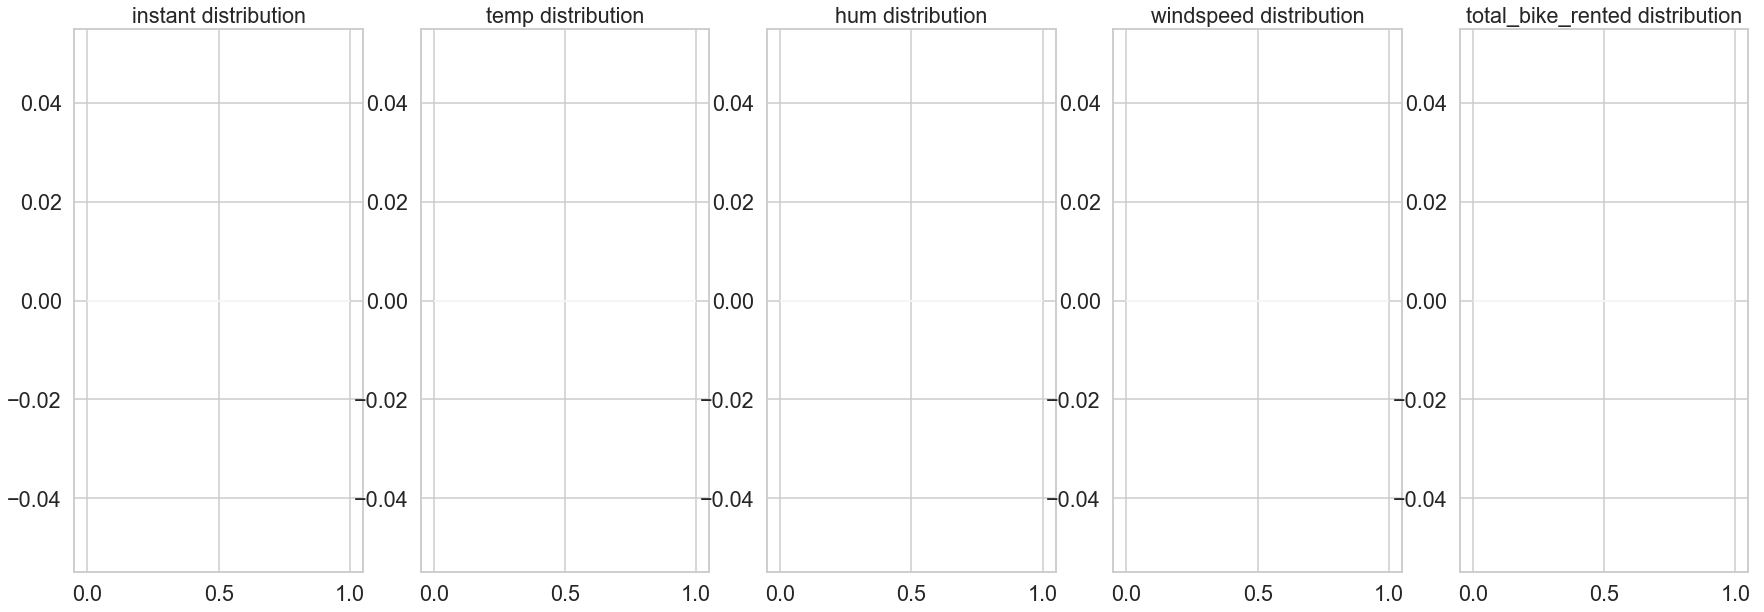

In [54]:
counter = 1
for i in df[numeric_cols].columns.values:
    plt.subplot(1, len(numeric_cols), counter)
    plt.hist(df[i])
    plt.title(str(i) + " " + "distribution")
    counter += 1

#### Considering the sensiticity of the Linear regression model to numeric features' skewness we try modifiy this by transforming variables with skewness higher than our threshold.

In [55]:
from scipy.stats import skew

In [56]:
df[["windspeed", "hum", "temp", "total_bike_rented"]].apply(
    lambda x: abs(skew(x)) > 0.75
)

NotImplementedError: dd.DataFrame.apply only supports axis=1
  Try: df.apply(func, axis=1)

###### As could be seen above our target variable is highly skewed and needs to get transformed. Doing so, we take sqaure root of the target variable and the skewness would be in the acceptabel range now:

In [57]:
skew(np.log(df.total_bike_rented))

-0.9361009597655617

#### As log transformation in this case cannot remove the skewness we try with sqrt

In [58]:
skew(np.sqrt(df.total_bike_rented))

0.28644988648376024

In [59]:
df["total_bike_rented"] = np.sqrt(df.total_bike_rented)
df.head()

,instant,datetime,season,yr,mnth,hr,holiday,weekday,workingday,weather_condition,temp,hum,windspeed,total_bike_rented
0,1,2011-01-01,Winter,2011,01-Jan,0,0,Saturday,0,A,0.24,0.81,0.0,4.000000
1,2,2011-01-01,Winter,2011,01-Jan,1,0,Saturday,0,A,0.22,0.80,0.0,6.324555
2,3,2011-01-01,Winter,2011,01-Jan,2,0,Saturday,0,A,0.22,0.80,0.0,5.656854
3,4,2011-01-01,Winter,2011,01-Jan,3,0,Saturday,0,A,0.24,0.75,0.0,3.605551
4,5,2011-01-01,Winter,2011,01-Jan,4,0,Saturday,0,A,0.24,0.75,0.0,1.000000


#### Outliers:

TypeError: Truth of Delayed objects is not supported

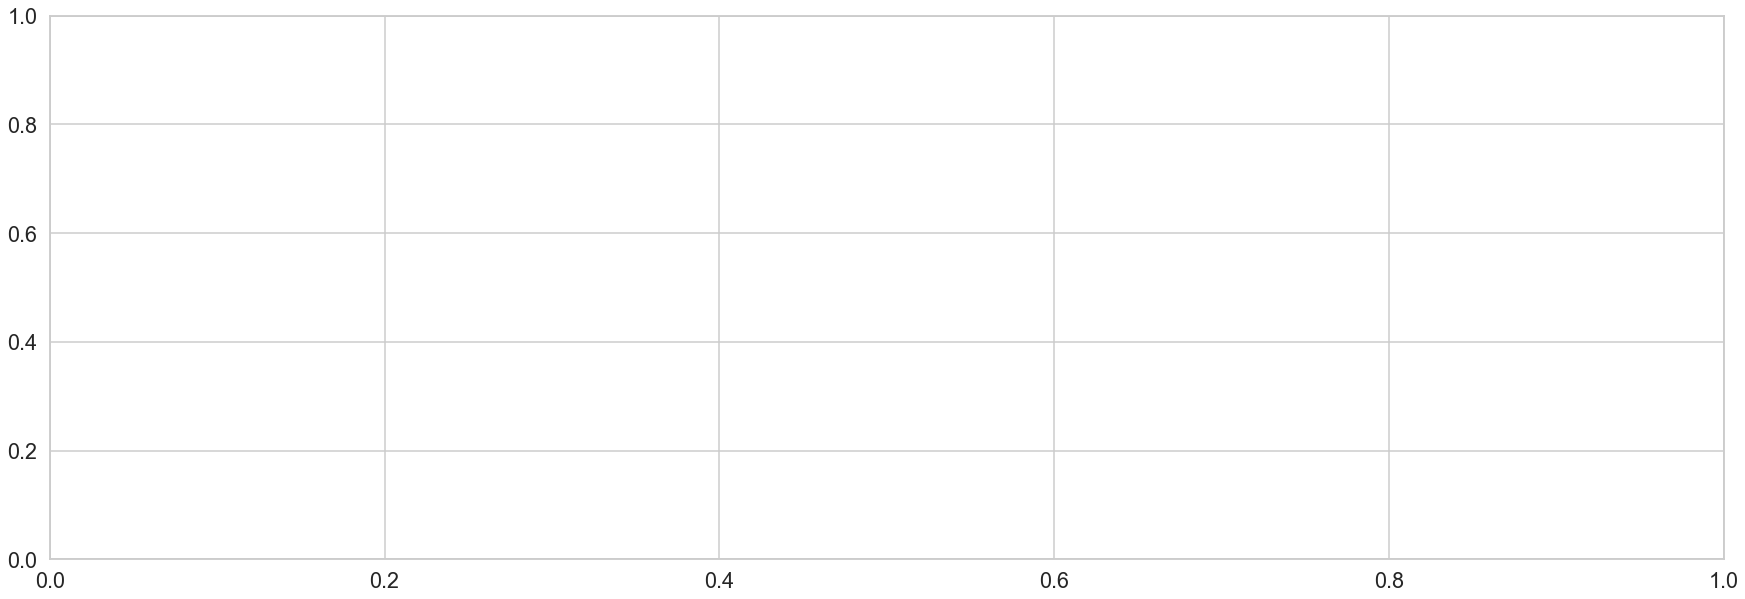

In [60]:
fig, ax = plt.subplots()
sns.boxplot(data=df[["hum", "temp", "windspeed"]], ax=ax, width=0.4);

#### Exploring the boxplots for univariate analysis of outliers it seems that the numeric features containing outliers are hum and windspeed, however it is not enough yet to consider those points outliers. Therefore we do a multivariate analysis of windspeed and target variable to see if we can get more information.

In [61]:
sns.scatterplot(df["hum"], df["total_bike_rented"]);

ValueError: If using all scalar values, you must pass an index

In [62]:
df['hum'].clip(lower=0.1, inplace=True)

TypeError: clip() got an unexpected keyword argument 'inplace'

In [63]:
sns.scatterplot(df["windspeed"], df["total_bike_rented"]);

ValueError: If using all scalar values, you must pass an index

##### The above scatter plot shows that probably winspeed values over 0.7 could be consider outliers, therefore our strategy at this point is to clip the windspeed values over 0.7 to o.7.

In [64]:
df["windspeed"].clip(upper=0.7, inplace=True)

TypeError: clip() got an unexpected keyword argument 'inplace'

In [65]:
sns.scatterplot(df["windspeed"], df["total_bike_rented"]);

ValueError: If using all scalar values, you must pass an index

#### Converting categoriacal features to dummy variables.

In [66]:
df = pd.get_dummies(df)

NotImplementedError: > 1 ndim Categorical are not supported at this time

In [67]:
df.head()

,instant,datetime,season,yr,mnth,hr,holiday,weekday,workingday,weather_condition,temp,hum,windspeed,total_bike_rented
0,1,2011-01-01,Winter,2011,01-Jan,0,0,Saturday,0,A,0.24,0.81,0.0,4.000000
1,2,2011-01-01,Winter,2011,01-Jan,1,0,Saturday,0,A,0.22,0.80,0.0,6.324555
2,3,2011-01-01,Winter,2011,01-Jan,2,0,Saturday,0,A,0.22,0.80,0.0,5.656854
3,4,2011-01-01,Winter,2011,01-Jan,3,0,Saturday,0,A,0.24,0.75,0.0,3.605551
4,5,2011-01-01,Winter,2011,01-Jan,4,0,Saturday,0,A,0.24,0.75,0.0,1.000000


#### As we are going to use the last quarter of 2012 as the test set we will keep the index from which this quarter starts and it is 15212.

#### Having finished the feature engineering part, we move to creating model

In [68]:
y = df["total_bike_rented"]
X = df.drop(["datetime", "total_bike_rented"], axis=1)

In [69]:
X_train = X[:15211]
X_test = X[15211:]
y_train = y[:15211]
y_test = y[15211:]

NotImplementedError: 

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# Modelling

## Simple Models

### Trying with Linear regression

In [72]:
lr = LinearRegression()
lr.fit(X_train, y_train)
cross_validation = cross_val_score(lr, X_train, y_train, cv=5)

NameError: name 'y_train' is not defined

In [73]:
cross_validation

NameError: name 'cross_validation' is not defined

In [74]:
lr_ridge = Ridge()
lr_ridge.fit(X_train, y_train)
Ridge_cv = cross_val_score(lr_ridge, X_train, y_train, cv=5)

NameError: name 'y_train' is not defined

In [75]:
Ridge_cv

NameError: name 'Ridge_cv' is not defined

In [76]:
lr_lasso = Lasso(alpha=0.001)
lr_lasso.fit(X_train, y_train)
Lasso_cv = cross_val_score(lr_lasso, X_train, y_train, cv=5)

NameError: name 'y_train' is not defined

In [77]:
Lasso_cv

NameError: name 'Lasso_cv' is not defined

In [78]:
lr_lasso.score(X_test, y_test)

NameError: name 'y_test' is not defined

## Optimizing

In [79]:
alphas = np.linspace(0.001, 0.003, 9)
score = []
for alpha in alphas:
    model = Lasso(alpha=alpha, normalize=False)
    model.fit(X_train, y_train)
    score.append(model.score(X_test, y_test))
plt.plot(alphas, score)

NameError: name 'y_train' is not defined

In [80]:
best_lasso = Lasso(alpha=0.00150)

In [81]:
best_lasso.fit(X_train, y_train)

NameError: name 'y_train' is not defined

#### Predicting the test values

In [82]:
y_pred = best_lasso.predict(X_test)

NotFittedError: This Lasso instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [83]:
result = pd.DataFrame({"truth": y_test, "pred": y_pred})
result["abs_diff"] = np.abs(y_test - y_pred)

NameError: name 'y_test' is not defined

In [84]:
sns.scatterplot(data=result, x="pred", y="truth", hue="abs_diff", palette="inferno");

NameError: name 'result' is not defined

#### For getting the true prediction we should undo the sqrt transformation :

In [85]:
RMSE = np.sqrt(np.mean((y_test ** 2 - y_pred ** 2) ** 2))
MSE = RMSE ** 2
print("MSE::{}".format(MSE))
print("RMSE::{}".format(RMSE))

NameError: name 'y_test' is not defined

In [86]:
np.sqrt(np.mean((np.log(y_pred ** 2 + 1) - np.log(y_test ** 2 + 1)) ** 2))

NameError: name 'y_pred' is not defined

#### As the R^2 score is not good enough in both Lasso and Ridge regression we will try other algorithm. RandomForest seems to be a good match for this dataset, as it does not have many features.

### Modeling using random forest

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [88]:
gsc = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={"max_depth": (5, 10, 15, 20), "n_estimators": (50, 100, 150, 200)},
    cv=3,
    scoring="neg_mean_squared_error",
    verbose=1,
    n_jobs=3,
)

grid_result = gsc.fit(X_train, y_train)

NameError: name 'y_train' is not defined

In [89]:
print(
    "Best Score: {}. with Params: {}".format(
        grid_result.best_score_, grid_result.best_params_
    )
)

NameError: name 'grid_result' is not defined

#### Having done the grid search we will do the model for the best parameters obtained from the grid search.

In [90]:
rf = grid_result.best_estimator_
rf.fit(X_train, y_train)
rf.predict(X_test)

NameError: name 'grid_result' is not defined

In [91]:
rf.score(X_train, y_train)

NameError: name 'rf' is not defined

In [92]:
rf.score(X_test, y_test)

NameError: name 'rf' is not defined

We can see a bit of overfitting in our RF model

In [93]:
y_pred_rf = rf.predict(X_test)

NameError: name 'rf' is not defined

In [94]:
RMSE = np.sqrt(np.mean((y_test ** 2 - y_pred_rf ** 2) ** 2))
MSE = RMSE ** 2
print("MSE::{}".format(MSE))
print("RMSE::{}".format(RMSE))

NameError: name 'y_test' is not defined

 We got much better result from random forest regressor R^2=0.86 while with linear regression the best R^2 was =0.74  
 MSE also for random forest is about half of that for linear regression model.

# SHOTGUN STRATEGY!!!!!

So we wanted to maximize our chances or validate that the Forest model ws good enough so we decided to try everything 

In [95]:
X_train.shape

(Delayed('int-b693c889-4ac1-46bd-ac89-63f6d4a96843'), 12)

In [96]:
X_test.shape

(Delayed('int-d91a42ef-89b5-4d8a-be07-bda47ea928b1'), 12)

We proceed to import every model we can find that trains in a reasonable amount of time

In [97]:
from sklearn.linear_model import (
    LinearRegression,
    ARDRegression,
    BayesianRidge,
    ElasticNet,
    Lasso,
    Ridge,
    HuberRegressor,
    PassiveAggressiveRegressor,
    SGDRegressor,
    TheilSenRegressor,
)
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_squared_log_error,
)
from sklearn.metrics import median_absolute_error
import time
from sklearn.ensemble import (
    AdaBoostRegressor,
    BaggingRegressor,
    ExtraTreesRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
)
from sklearn.svm import LinearSVR, NuSVR, SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor

In [98]:
total_models = pd.DataFrame()

In [99]:
model_names = [
    "DecisionTreeRegressor",
    "ExtraTreeRegressor",
    "LinearRegression",
    "BayesianRidge",
    "ElasticNet",
    "Lasso",
    "Ridge",
    "HuberRegressor",
    "PassiveAggressiveRegressor",
    "SGDRegressor",
    "TheilSenRegressor",
    "AdaBoostRegressor",
    "BaggingRegressor",
    "ExtraTreesRegressor",
    "GradientBoostingRegressor",
    "RandomForestRegressor",
    "LinearSVR",
    "NuSVR-Linear",
    "NuSVR-Poly",
    "NuSVR-RBF",
    "NuSVR-Sigmoid",
    "SVR-Linear",
    "SVR-Poly",
    "SVR-RBF",
    "SVR-Sigmoid",
]
models = [
    LinearRegression(),
    BayesianRidge(),
    ElasticNet(),
    Lasso(),
    Ridge(),
    HuberRegressor(),
    PassiveAggressiveRegressor(),
    SGDRegressor(),
    TheilSenRegressor(),
    DecisionTreeRegressor(), 
    ExtraTreeRegressor(),
    AdaBoostRegressor(),
    BaggingRegressor(),
    ExtraTreesRegressor(),
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    LinearSVR(),
    NuSVR(kernel="linear"),
    NuSVR(kernel="poly"),
    NuSVR(kernel="rbf"),
    NuSVR(kernel="sigmoid"),
    SVR(kernel="linear"),
    SVR(kernel="poly"),
    SVR(kernel="rbf"),
    SVR(kernel="sigmoid"),
]

mse = []
mae = []
msle = []
medae = []
r2 = []
trained_model = []
time_train = []

for model in models:
    start = time.time()
    model.fit(X_train, y_train)

    mse.append(mean_squared_error(y_test, model.predict(X_test)))
    mae.append(mean_absolute_error(y_test, model.predict(X_test)))
    msle.append(mean_squared_log_error(y_test, abs(model.predict(X_test))))
    medae.append(median_absolute_error(y_test, model.predict(X_test)))
    r2.append(model.score(X_test, y_test))

    stop = time.time()
    tr_time = stop - start
    time_train.append(tr_time)
    trained_model.append(model)
    # print(model)
models = pd.DataFrame(
    data={
        "model": model_names,
        "time_train": time_train,
        "MAE": mae,
        "MSE": mse,
        "MSLE": msle,
        "MEDAE": medae,
        "R2": r2,
    }
)

NameError: name 'y_train' is not defined

In [100]:
total_models = pd.concat([total_models, models])

TypeError: cannot concatenate object of type "<class 'list'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

In [101]:
total_models.sort_values("R2", ascending=False)

KeyError: 'R2'

We can see all the default models ranked based on MSE and the we decided to take the top 3 models and optimize them using a grid search with cross validation 

# Best Models Optimization

In [102]:
from sklearn.model_selection import GridSearchCV

# ExtraTreesRegressor

In [103]:
param_grid = {
    "n_estimators": [200, 300, 400, 500],
    "max_depth": [28, 30, 32, 34],
}

In [104]:
gridETR = GridSearchCV(ExtraTreesRegressor(), param_grid=param_grid, cv=5,verbose=1, n_jobs=-1)

In [105]:
gridETR.fit(X_train, y_train)

NameError: name 'y_train' is not defined

In [106]:
gridETR.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [107]:
gridETR.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [108]:
scores = pd.DataFrame(gridETR.cv_results_) # 

#transform into pivot table to plot the heatmap
scorespiv=scores.pivot("param_max_depth", "param_n_estimators", "mean_test_score") 
scorespiv

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [109]:
sns.heatmap(scorespiv);

NameError: name 'scorespiv' is not defined

In [110]:
model = gridETR.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [111]:
model.score(X_test, y_test)

NameError: name 'y_test' is not defined

In [112]:
preds = model.predict(X_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [113]:
mean_absolute_error(y_test, preds)

NameError: name 'y_test' is not defined

# Bagging Regressor

In [114]:
param_grid = {
    "max_samples": [0.9,0.92,0.94,0.96,0.98, 1],
    "max_features": [0.9,0.92,0.94,0.96,0.98, 1],
    "n_estimators":[30],
    "random_state":[42],
}

In [115]:
gridBR = GridSearchCV(BaggingRegressor(), param_grid=param_grid, cv=5,verbose=1, n_jobs=-1)

In [116]:
gridBR.fit(X_train, y_train)

NameError: name 'y_train' is not defined

In [117]:
gridBR.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [118]:
gridBR.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [119]:
scores = pd.DataFrame(gridBR.cv_results_) # 

#transform into pivot table to plot the heatmap
scorespiv=scores.pivot("param_max_features", "param_max_samples", "mean_test_score") 
scorespiv

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [120]:
sns.heatmap(scorespiv);

NameError: name 'scorespiv' is not defined

In [121]:
model = gridBR.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [122]:
model.score(X_test, y_test)

NameError: name 'y_test' is not defined

In [123]:
preds = model.predict(X_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [124]:
mean_absolute_error(y_test, preds)

NameError: name 'y_test' is not defined

# Random Forest Regressor

In [125]:
param_grid = {"n_estimators": [350, 400, 450, 500], "max_depth": [27, 28, 29, 30]}

In [126]:
gridRFR = GridSearchCV(
    RandomForestRegressor(), param_grid=param_grid, cv=5, verbose=1, n_jobs=-1
)

In [127]:
gridRFR.fit(X_train, y_train)

NameError: name 'y_train' is not defined

In [128]:
gridRFR.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [129]:
gridRFR.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [130]:
scores = pd.DataFrame(gridRFR.cv_results_)  #

# transform into pivot table to plot the heatmap
scorespiv = scores.pivot("param_n_estimators", "param_max_depth", "mean_test_score")
scorespiv

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [131]:
sns.heatmap(scorespiv);

NameError: name 'scorespiv' is not defined

In [132]:
model = gridRFR.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [133]:
model.score(X_test, y_test)

NameError: name 'y_test' is not defined

In [134]:
preds = model.predict(X_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [135]:
mean_absolute_error(y_test, preds)

NameError: name 'y_test' is not defined

In [136]:
gridRFR = GridSearchCV(
    RandomForestRegressor(), param_grid=param_grid, cv=5, verbose=1, n_jobs=-1
)

# Conclusions:

We found out that the best models are basically bagging meta estimators for trees:  
Extra Trees seem like a bagging meta estimator that produces a Random Forest Regressor but using all of the features instead of a subset of features like RandomForest.  
Bagging Regressor is another meta estimator that does bagging. But allows us to change the aggregation function between all the trees.  
We tried all of them and came to very similar results. At the end an ensemble Tree method was the better model. 